<a href="https://colab.research.google.com/github/Qu1nnD/CS290/blob/main/StrokePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's practice loading and exploring some data! 😀

In [79]:
import pandas as pd

In [80]:
df = pd.read_csv("https://raw.githubusercontent.com/mbrudd/csci290/main/data/stroke.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [81]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [82]:
df["stroke"].unique()

array([1, 0])

In [83]:
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [84]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [85]:
df["stroke"].value_counts()

,count
stroke,
0,4861
1,249


In [86]:
df["stroke"].value_counts(normalize=True)

,proportion
stroke,
0,0.951272
1,0.048728


In [87]:
df[["stroke","Residence_type"]].value_counts()

stroke  Residence_type
0       Urban             2461
        Rural             2400
1       Urban              135
        Rural              114
Name: count, dtype: int64

In [88]:
df["stroke"].mean()

0.0487279843444227

<Axes: xlabel='age', ylabel='stroke'>

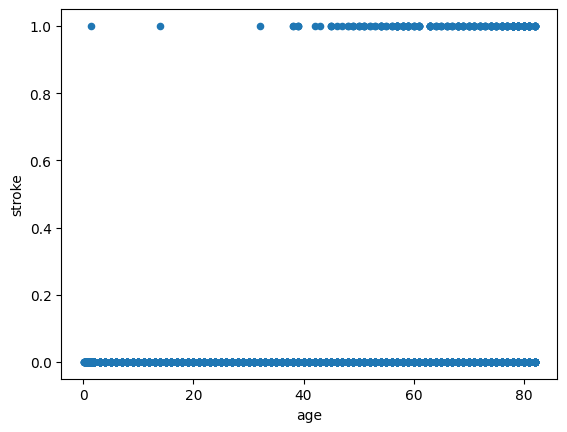

In [89]:
df.plot(x="age",y="stroke",kind="scatter")

In [90]:
df["age_cat"]=pd.cut(df["age"],bins=[0,25,45,61,100],labels=["Young","Adult","Middle-aged","Old"])

In [91]:
df["age_cat"].value_counts()

,count
age_cat,
Adult,1325
Young,1293
Middle-aged,1264
Old,1228


In [92]:
df.groupby("age_cat", observed=True)["stroke"].mean()

,stroke
age_cat,
Young,0.001547
Adult,0.008302
Middle-aged,0.051424
Old,0.139251


In [93]:
df.groupby("hypertension")["stroke"].mean()

,stroke
hypertension,
0,0.039679
1,0.132530


In [94]:
df.groupby("heart_disease")["stroke"].mean()

,stroke
heart_disease,
0,0.041787
1,0.170290


In [95]:
df.groupby(["heart_disease","hypertension","ever_married"])["stroke"].mean()

heart_disease  hypertension  ever_married
0              0             No              0.008923
                             Yes             0.049283
               1             No              0.159091
                             Yes             0.117949
1              0             No              0.130435
                             Yes             0.164021
               1             No              0.444444
                             Yes             0.163636
Name: stroke, dtype: float64

In [96]:
df["prediction"]=df["age"]>61

In [97]:
df["prediction"].value_counts()

,count
prediction,
False,3882
True,1228


In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
confusion_matrix(df["stroke"],df["prediction"])

array([[3804, 1057],
       [  78,  171]])

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [101]:
cm=confusion_matrix(df["stroke"],df["prediction"])
cm

array([[3804, 1057],
       [  78,  171]])

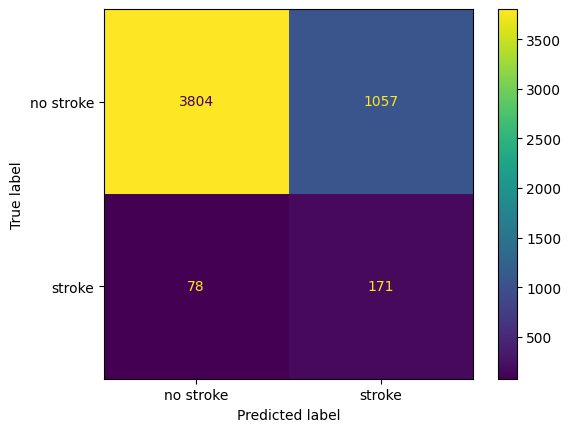

In [102]:
ConfusionMatrixDisplay(cm,display_labels=["no stroke","stroke"]).plot()

In [103]:
tn, fp, fn, tp = confusion_matrix(df["stroke"],df["prediction"]).ravel()
tn, fp, fn, tp

(3804, 1057, 78, 171)

In [104]:
import sklearn.metrics as metrics

In [105]:
metrics.recall_score(df["stroke"],df["prediction"])

0.6867469879518072

In [106]:
tp/(tp+fn)

0.6867469879518072

In [107]:
metrics.precision_score(df["stroke"],df["prediction"])

0.13925081433224756

In [108]:
tp/(tp+fp)

0.13925081433224756

In [109]:
def precision_vs_recall(threshold):
  df["prediction"]=df["age"]>threshold
  return metrics.precision_score(df["stroke"], df["prediction"]), metrics.recall_score(df["stroke"],df["prediction"])

In [110]:
precision_vs_recall(61)

(0.13925081433224756, 0.6867469879518072)

In [111]:
precisions=[]
recalls=[]
thresholds=range(0,82)
for threshold in thresholds:
  precision, recall = precision_vs_recall(threshold)
  precisions.append(precision)
  recalls.append(recall)

In [112]:
pr=pd.DataFrame({
    "threshold":thresholds,
    "precision":precisions,
    "recall":recalls
})

In [113]:
pr.tail()

,threshold,precision,recall
77,77,0.209115,0.313253
78,78,0.210332,0.228916
79,79,0.215054,0.160643
80,80,0.198276,0.092369
81,81,0.160714,0.036145


<Axes: xlabel='threshold'>

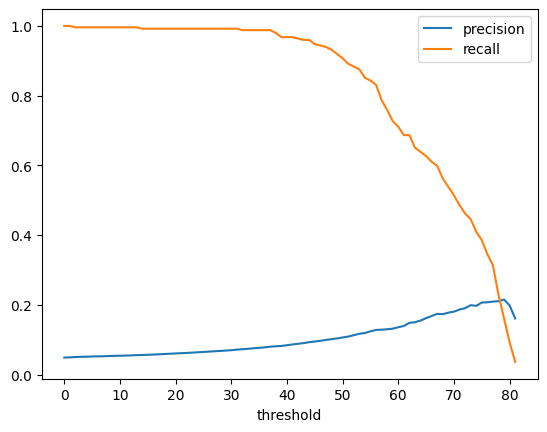

In [114]:
pr.plot(x="threshold", y=["precision", "recall"])

In [115]:
def get_fpr(threshold):
  df["prediction"]=df["age"]>threshold
  tn,fp,fn,tp=confusion_matrix(df["stroke"],df["prediction"]).ravel()
  fpr=(fp/(tn+fp))
  return fpr

In [116]:
fprs=[]
for threshold in thresholds:
  fpr=get_fpr(threshold)
  fprs.append(fpr)


In [117]:
pr["fpr"]=fprs

In [118]:
pr.head()

,threshold,precision,recall,fpr
0,0,0.048728,1.000000,1.000000
1,1,0.049190,1.000000,0.990125
2,2,0.050253,0.995984,0.964205
3,3,0.050726,0.995984,0.954742
4,4,0.051081,0.995984,0.947747


<Axes: xlabel='fpr'>

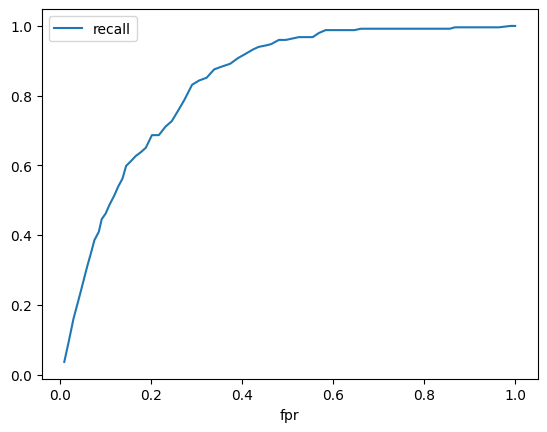

In [119]:
pr.plot(x="fpr",y="recall")

In [120]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df,test_size=0.2)

In [121]:
train_set.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_cat', 'prediction'],
      dtype='object')

In [122]:
train_set=train_set[["gender","age","hypertension","heart_disease","smoking_status","stroke"]]

In [123]:
test_set=test_set[["gender","age","hypertension","heart_disease","smoking_status","stroke"]]

In [124]:
X_train=train_set[["gender","age","hypertension","heart_disease","smoking_status"]]
y_train=train_set[["stroke"]]

In [125]:
X_test=test_set[["gender","age","hypertension","heart_disease","smoking_status"]]
y_test=test_set[["stroke"]]

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
#DecisionTreeClassifier(max_depth=3).fit(X_train,Y_train) won't work unless all stuff is numbers

In [128]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

In [129]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4088 entries, 3029 to 2577
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          4088 non-null   object 
 1   age             4088 non-null   float64
 2   hypertension    4088 non-null   int64  
 3   heart_disease   4088 non-null   int64  
 4   smoking_status  4088 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 191.6+ KB


In [130]:
num_attributes=X_train.select_dtypes(include=['int64','float64']).columns
cat_attributes=X_train.select_dtypes(include=['object']).columns

In [131]:
num_attributes

Index(['age', 'hypertension', 'heart_disease'], dtype='object')

In [132]:
trf=[('num',StandardScaler(),num_attributes),('cat',OneHotEncoder(handle_unknown='ignore'),cat_attributes)]
col_transform=ColumnTransformer(transformers=trf)

In [133]:
pipeline=Pipeline(steps=[('pre',col_transform),('clif',DecisionTreeClassifier(max_depth=3))])

In [134]:
cross_val_score(pipeline,X_train,y_train,cv=3,scoring='accuracy')

array([0.95231108, 0.95231108, 0.95301028])

In [135]:
model=pipeline.fit(X_train,y_train)
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'hypertension', 'heart_disease'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'smoking_status'], dtype='object'))])),
                ('clif', DecisionTreeClassifier(max_depth=3))])

In [136]:
predictions = pipeline.predict(X_test)

In [137]:
cm=confusion_matrix(y_test,predictions)

In [138]:
cm

array([[967,   0],
       [ 55,   0]])